In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Load the data
df = pd.read_csv('../data/kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Linear Regression 
A method to help us understand the relationship between two variables:
- The predictor (independent variable): X
- The response (dependent variable): Y

The result of a linear regression is a function that predicts the response variable as a function of the predictor 

$
\widehat{Y} = a + bX
$
- `a` refers to the `intercept` of the line
- `b` refers to the `slope`

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
# Create a linear regression object 
lm = LinearRegression()
lm

LinearRegression()

### How could the `sqft_living` help us predict the house `price`?

In [7]:
X = df[['sqft_living']] # This needs to be a two dimensional array
Y = df['price'] # This can be a one dimensional array

In [8]:
# Fit the linear model
lm.fit(X, Y)

LinearRegression()

In [9]:
# Get the output prediction using X
Yhat = lm.predict(X)

# Print the first 5 predictions
Yhat[0:5]

array([287555.06702451, 677621.82640197, 172499.40418656, 506441.44998452,
       427866.85097324])

In [10]:
# Get the value of the intercept (a) 
lm.intercept_

-43580.743094479316

In [11]:
# Get the value of the slope (b)
lm.coef_

array([280.6235679])

Final estimated linear model

$
\widehat{Y} = a + bX
$

In our case:
$
price = -43580.74 + 280.62356X
$

In [12]:
Yhat = -43580.74 + 280.62356*X
print(f'Using X price = {Yhat}')
# or using price 
price = -43580.74 + 280.62356*df['sqft_living']
print(f'Using price price = {price}')

Using X price =        sqft_living
0      287555.0608
1      677621.8092
2      172499.4012
3      506441.4376
4      427866.8408
...            ...
21608  385773.3068
21609  604659.6836
21610  242655.2912
21611  405416.9560
21612  242655.2912

[21613 rows x 1 columns]
Using price price = 0        287555.0608
1        677621.8092
2        172499.4012
3        506441.4376
4        427866.8408
            ...     
21608    385773.3068
21609    604659.6836
21610    242655.2912
21611    405416.9560
21612    242655.2912
Name: sqft_living, Length: 21613, dtype: float64


## Task 1 
Repeat the process (Linear Model prediction) but using `bedrooms` as the independent variable and `price` as the dependent variable

In [13]:
X = df[['bedrooms']]
Y = df['price']

# Fit the linear model
lm2 = LinearRegression()
lm2.fit(X, Y)

# Get the output prediction using X
Yhat = lm2.predict(X)

# Print the first 5 predictions
print(f'The first 5 predictions {Yhat[0:5]}')

# Print the value of the intercept (a)
a = lm2.intercept_
print(f'The value of the intercept (a): {a}')

# Print the value of the slope (b)
b = lm2.coef_
print(f'The value of the slope (b): {b}')

The first 5 predictions [494950.73585378 494950.73585378 373234.60934197 616666.8623656
 494950.73585378]
The value of the intercept (a): 129802.35631833959
The value of the slope (b): [121716.12651181]


In [14]:
# Calculate the price using the formula 
Yhat = a + b*X
print(f'Using X price = {Yhat}')
# or using price
price = b + a*df['bedrooms']
print(f'Using price price = {price}')

Using X price =             bedrooms
0      494950.735854
1      494950.735854
2      373234.609342
3      616666.862366
4      494950.735854
...              ...
21608  494950.735854
21609  616666.862366
21610  373234.609342
21611  494950.735854
21612  373234.609342

[21613 rows x 1 columns]
Using price price = 0        511123.195467
1        511123.195467
2        381320.839148
3        640925.551785
4        511123.195467
             ...      
21608    511123.195467
21609    640925.551785
21610    381320.839148
21611    511123.195467
21612    381320.839148
Name: bedrooms, Length: 21613, dtype: float64


## Multiple Linear Regression 
If you want to use more variables in our model to predict the price, then, use a `multiple linear regression`

$
\widehat{Y} = a + b_{1}X_{1} + b_{2}X_{2} + b_{3}X_{3}...b_{n}X_{n}
$

For this example good predtors of price will be:
- `sqft_living`
- `bedrooms`
- `bathrooms`
- `sqft_lot`

In [15]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Load the data
df = pd.read_csv('../data/kc_house_data.csv')

In [16]:
# Get all the predictor variables 
X = df[['sqft_living', 'bedrooms', 'bathrooms', 'sqft_lot']] # 2d array
Y = df['price'] # 1d array

# Create a linear regression object
lm = LinearRegression()

# Fit the linear model
lm.fit(X, Y)

LinearRegression()

In [17]:
# Get the intercept (a)
a = lm.intercept_

# Get the slopes (coefficients) (b1, b2, b3, b4)
b = lm.coef_

In [18]:
Yhat = a + (b[0]*X['sqft_living']) + (b[1]*X['bedrooms']) + (b[2]*X['bathrooms']) + (b[3]*X['sqft_lot'])
Yhat

0        275871.036998
1        719971.131432
2        204775.455179
3        474394.561754
4        438367.862006
             ...      
21608    396982.741865
21609    580955.302268
21610    285047.915072
21611    418508.453026
21612    285151.391879
Length: 21613, dtype: float64

(0.0, 8084011.217035032)

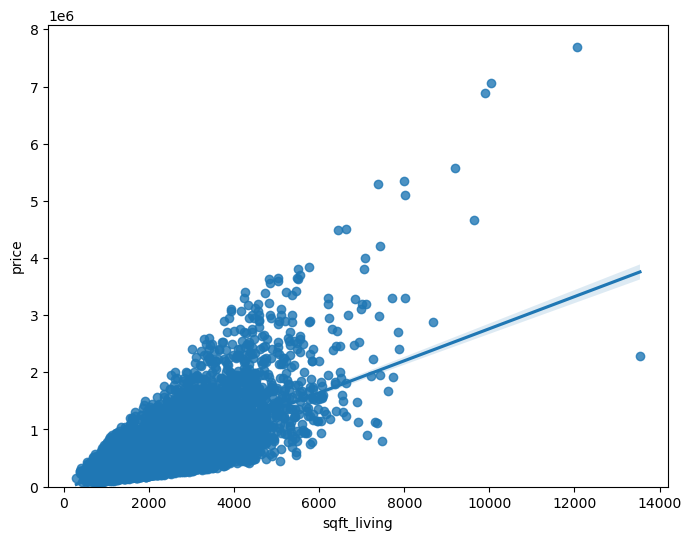

In [19]:
width = 8
height = 6
plt.figure(figsize=(width, height))
sns.regplot(x='sqft_living', y='price', data=df)
plt.ylim(0,)

(0.0, 8081250.0)

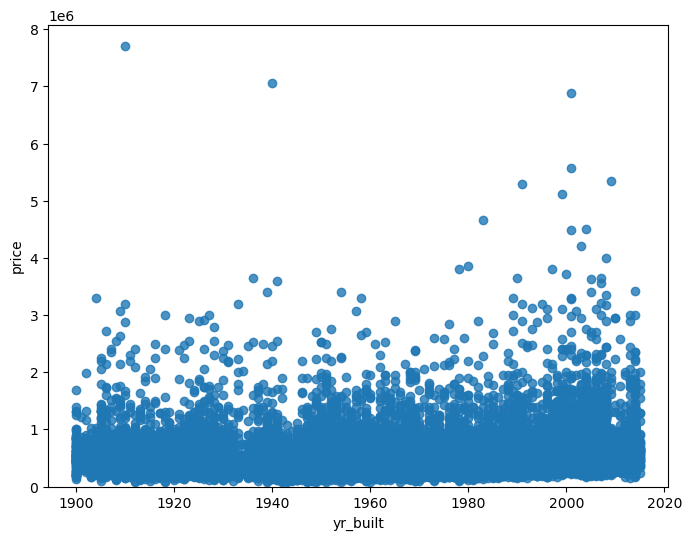

In [20]:
plt.figure(figsize=(width, height))
sns.regplot(x='yr_built', y='price', data=df)
plt.ylim(0,)

### Residual Plot 
This is a good way to visualize the `variance` of the data
- `Residual` is the difference between the `observed value (y)` and the `predicted value (Yhat)`

<Axes: xlabel='sqft_living', ylabel='price'>

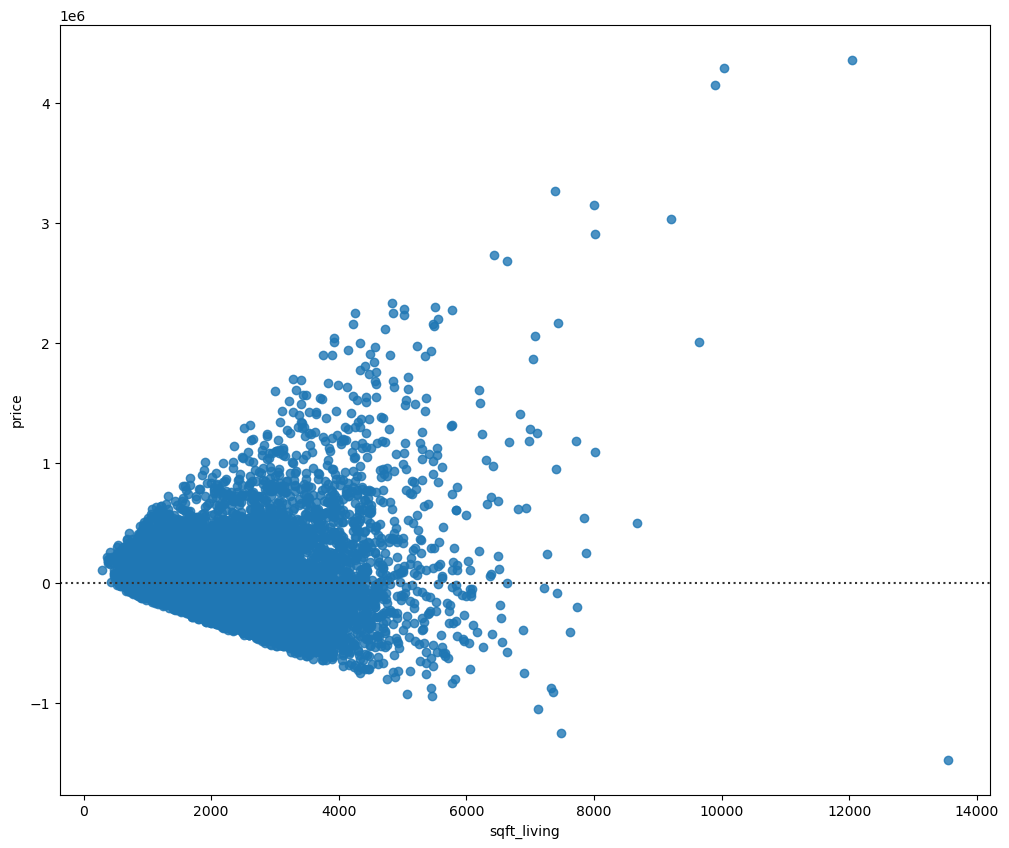

In [21]:
plt.figure(figsize=(12, 10))
sns.residplot(x=df['sqft_living'], y=df['price'])

### Multiple Linear Regression Model Visualization

In [22]:
# Make our prediction
lm = LinearRegression()
# Get all the predictor variables 
X = df[['sqft_living', 'bedrooms', 'bathrooms', 'sqft_lot']] # 2d array
Y = df['price'] # 1d arrayYhat = lm.predict(X)
lm.fit(X, Y)
Yhat = lm.predict(X)

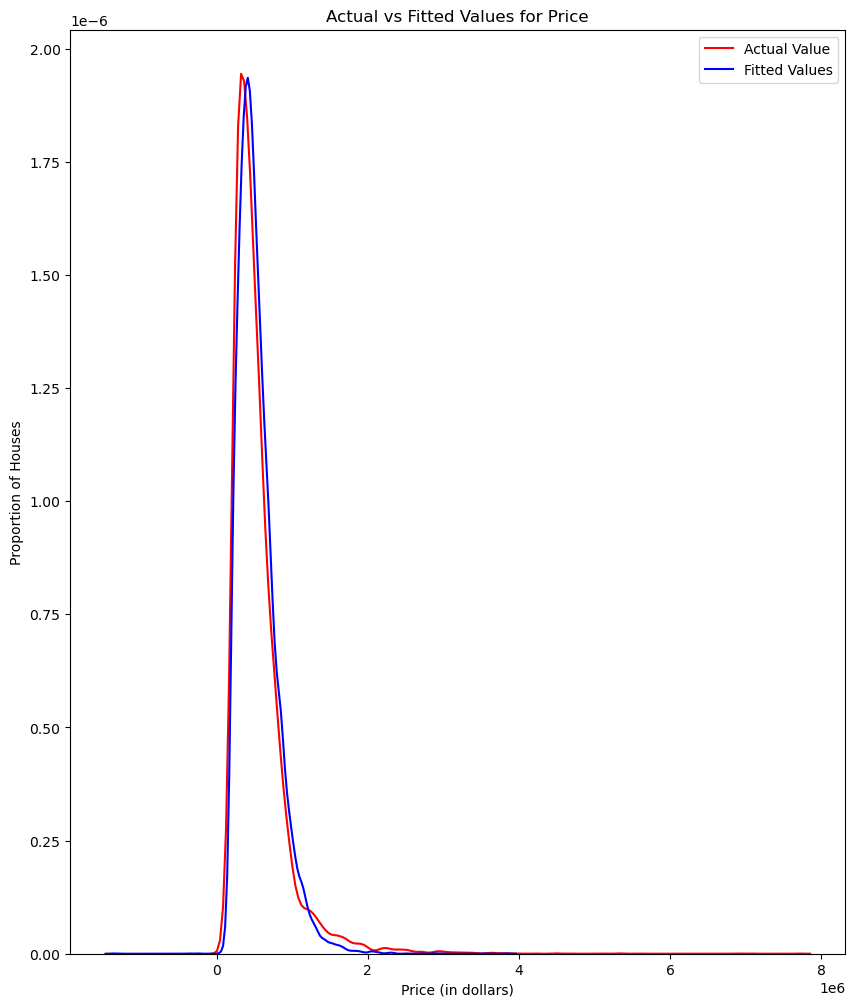

In [23]:
plt.figure(figsize=(10, 12))
# ax1 = sns.distplot(df['price'], hist=False, color='r', label='Actual Value')
# sns.distplot(Yhat, hist=False, color='b', label='Fitted Values', ax=ax1)
sns.kdeplot(df['price'], color='r', label='Actual Value')
sns.kdeplot(Yhat, color='b', label='Fitted Values')


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Houses')
plt.legend()

In [24]:
def PlotPolly(model, independent_variable, dependent_variable, Name):
    x_new = np.linspace(15, 55, 100) # linespace for x axis
    y_new = model(x_new) # get the y values

    # Plot the data
    plt.plot(independent_variable, dependent_variable, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca() # gca returns the current axes
    ax.set_facecolor((0.898, 0.898, 0.898)) # set the background color
    fig = plt.gcf() # gcf returns the current figure
    plt.xlabel(Name)
    plt.ylabel('Price of Homes')


Get the variables

In [25]:
x = df['sqft_living']
y = df['price']

In [26]:
# Fit the plynomial (3rd order, cubic)
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

            3           2
-3.841e-06 x + 0.08705 x - 90.18 x + 3.368e+05


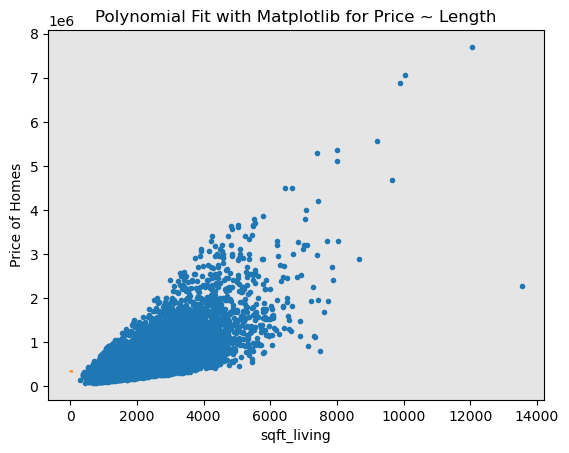

In [27]:
# Plot the function
PlotPolly(p, x, y, 'sqft_living')

### Measures for In-sample Evaluations 

You need to do a quantitative measure to determine how accurate your model is. There are two measurements we do:
- $R^{2}$
- $Mean Square Error (MSE)$

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
# Load the data
df = pd.read_csv('../data/kc_house_data.csv')
X = df[['sqft_living']]
Y = df['price']
Z = [['sqft_living', 'bedrooms', 'bathrooms', 'sqft_lot']]

# Calcualte our r2
lm = LinearRegression()
lm.fit(X, Y)

# find the r2
print(f'The R-square is: {lm.score(X, Y)}')

The R-square is: 0.4928532179037931


In [29]:
# Calcualte or r2 
lm.fit(X, Y)
# Find the r2
print(f'The R-square is: {lm.score(X, Y)}')

The R-square is: 0.4928532179037931


In [30]:
# Calcualte the MSE 
Yhat = lm.predict(X)
print(f'The output of the first four predicted value is: {Yhat[0:4]}')

The output of the first four predicted value is: [287555.06702451 677621.82640197 172499.40418656 506441.44998452]


In [31]:
from sklearn.metrics import mean_squared_error
# Compare it with the actual values
mse = mean_squared_error(df['price'], Yhat)
print('The MSE of price and predicted value is: ', mse)

The MSE of price and predicted value is:  68351286833.039825


### Model 2: Multiple Linear Regression

In [32]:
# Get prediction of multifit
Y_predict_multifit = lm.predict(Z)
# Compare the predicted results with the actual results
print('The mean square error of price and predicted value using multifit is: ', mean_squared_error(df['price'], Y_predict_multifit))

/opt/miniconda3/envs/module8/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: dtype='numeric' is not compatible with arrays of bytes/strings.Convert your data to numeric values explicitly instead.

### Model 3: Polynomial Fit

In [ ]:
# Multiple linear regression